# Cell Community Detection

Sequencing technology advances applied in spatial transcriptomics opened a new window into the tissue micro-environment. By capturing gene expression profiles of individual cells along with their spatial coordinates, researchers have gained the ability to accurately ascertain cell types and their respective functions. While some cell types are known to coexist within various regions of the tissue, the co-occurrence of many others remains elusive.

The proposed __Cell Community Detection (CCD) algorithm__ addresses this challenge by offering a novel computational approach for identifying tissue domains with a significant mixture of particular cell types. The CCD algorithm divides the tissue using _sliding windows_, quantifies the proportion of each cell type within each window, and groups together windows with similar cell type mixtures. By employing _majority voting_, the algorithm assigns a community label to each cell based on the labels of windows covering it. Notably, CCD accommodates multiple window sizes and enables the simultaneous analysis of multiple slices from the same tissue. Its Python implementation with a flexible user interface enables the processing of datasets with tens of thousands of cells in sub-minute execution time.

## Multi-size sliding window approach

CCD divides the tissue using sliding windows by accommodating multiple window sizes, and enables the simultaneous analysis of multiple slices from the same tissue. CCD consists of the three main steps:

* Single or multiple-size sliding windows ($w$) are moved through the surface of the tissue with defined horizontal and vertical step while calculating the percentages ($[p_1, p_2,...,p_n]$) of each cell type inside of it. A feature vector ($fv$) with size equal to the number of cell types ($n$) is created for each processed window across all available tissue slices: 

$$\begin{equation}
    \forall w_i\rightarrow (fv_i = [p_1, p_2,...,p_n])
\end{equation}$$

* Feature vectors from all windows are fed to the clustering algorithm ($C$) such as Leiden, Spectral or Hierarchical to obtain community labels ($l$). The number of the desired communities ($cn$) can be predefined explicitly as a parameter (Spectral or Hierarchical clustering) or by setting the resolution of clustering (Leiden):

$$\begin{equation}
    C(\forall fv_i) \rightarrow l_i, l_i \in {l_1, l_2, ..., l_{cn}}
\end{equation}$$

* Community label is assigned to each cell-spot ($cs$) by majority voting ($MV$) using community labels from all windows covering it:

$$\begin{equation}
    MV(\forall l_i)\text{ where } spatial(cs_j) \in w_i \rightarrow l_j, l_j \in {l_1, l_2, ..., l_{cn}}
\end{equation}$$

The window size and sliding step are optional CCD parameters. If not provided, the optimal window size is calculated throughout the iterative process with goal of having average number of cell-spots in all windows in range [30, 50]. Sliding step is set to the half of the window size.


## Data Preparation

CCD is a part of the algorithm module of Stereopy. It expects a slice or a list of slices as input, depending on single or multiple slice processing. CCD could process samples from all types of spatial transcriptomics technologies.

In order to be processed by CCD, an data object (each of them) requires:
-  cell spatial coordinates,
-  cell type annotation,
-  cell type color palette.

When you work with AnnData H5ad file, spatial coordinates should be placed in <font color=green>.obsm['spatial']</font>, cell annotation labels in <font color=green>.obs['<annotation_name>']</font> and color palette for cell types in <font color=green>.uns['<annotation_name>_colors']</font>.

Download a slice of demo data, [Stereo-seq Mouse Embryo Whole brain](https://ftp.cngb.org/pub/SciRAID/stomics/STDS0000058/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad). More in [example data](http://116.6.21.110:8090/share/dd965cba-7c1f-40b2-a275-0150890e005f).

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
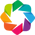

In [1]:
import stereo as st
from stereo.core.stereo_exp_data import AnnBasedStereoExpData
from stereo.algorithm.community_detection import CommunityDetection
from stereo.core.ms_data import MSData

data = st.io.read_h5ad('../data/E16.5_E1S3_cell_bin_whole_brain.h5ad')

In [2]:
# MSData
ms_data =MSData()

ms_data += st.io.read_h5ad('../data/Embyro_anndata075/Embyro_E9.5.h5ad')
ms_data += st.io.read_h5ad('../data/Embyro_anndata075/Embyro_E10.5.h5ad')

## Run CCD

In the current example CCD is run for single slice of mouse embryo whole brain Stereo-seq sample. Window size is set to 150, and sliding step to 50. This provides, on average, 30 cells per window. By employing scatteredness threshold and downsampling rate cell types that are spread throughout the tissue, providing no localization or community perspective, are removed. Hierarchical agglomerative clustering algorithm with ward linkage is chosen with predefined number of 16 clusters.

You can get further information about parameters from  the [API](../content/stereo.algorithm.community_detection.CommunityDetection.main.html) documents.

In [3]:
# use a 'ccd' object to obtain the set of analysis results
ccd = data.tl.community_detection(
            annotation='sim anno', 
            out_path='results/whole_brain', 
            win_sizes='150', 
            sliding_steps='50', 
            scatter_thres=0.12, 
            downsample_rate=80, 
            cluster_algo='agglomerative', 
            n_clusters=16, 
            resolution=0.25, 
            plotting=5,
            hide_plots=True
            )

[2023-09-11 11:39:31][Stereo][26988][MainThread][139824720418624][st_pipeline][71][INFO]: register algorithm community_detection to <stereo.core.st_pipeline.AnnBasedStPipeline object at 0x7f2b2a3dac40>
[2023-09-11 11:39:31][Stereo][26988][MainThread][139824720418624][community_detection][328][INFO]: Window size info for slice: Slice_0     
                     window size: 150
                     sliding step: 50
                     cells mean: 21.75
                     cells median: 24.0
                     num horizontal windows: 94
                     num vertical windows: 66

                     
[2023-09-11 11:39:32][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.3214s
[2023-09-11 11:39:32][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_annotation took 0.9834s
[2023-09-11 11:39:38][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function calc_feature_matrix took 6.0911s
[2023-09-11 11:39:3

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

##  Visualizations

CCD suports a wide range of visualizations, created in order to provide the analyst with deep insight into data. Visualizations cover basic annotation and CCD cluster plots, as well as tables containing cell mixtures data and cell type abundances per cluster and type. Additionally, per community plots are supported for analysis and comparison in case/control scenarios. 

#### By Clustering

Cell type annotation:

[2023-09-11 11:56:22][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.2290s


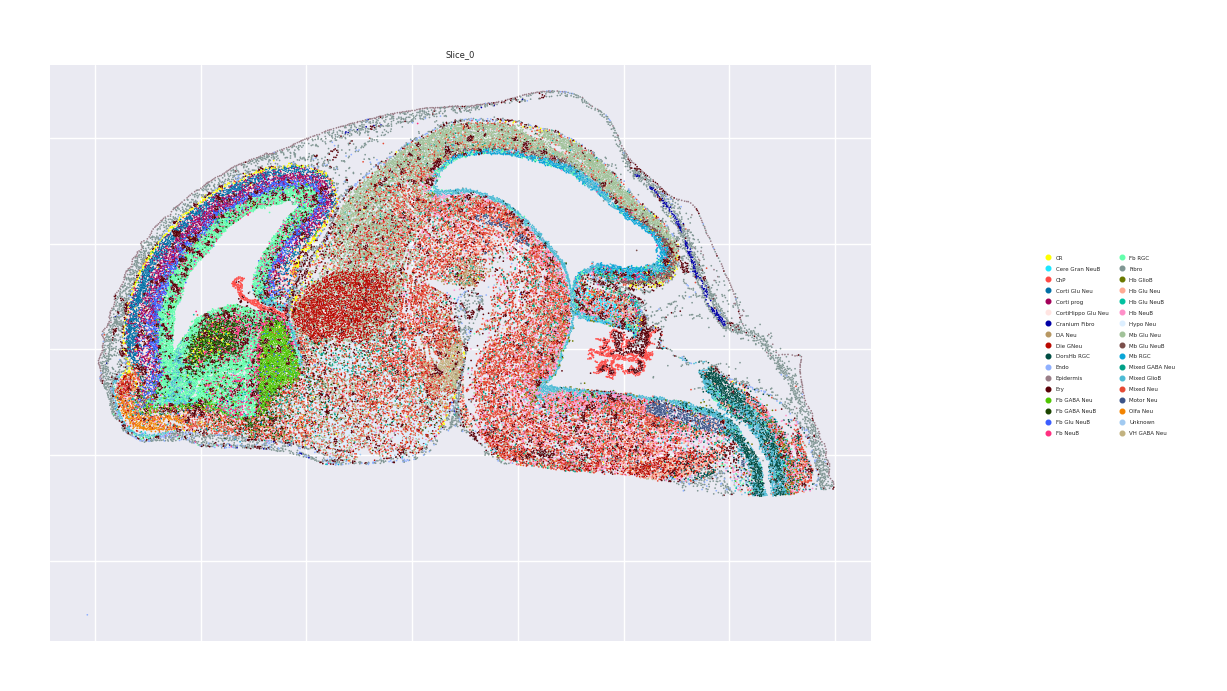

[2023-09-11 11:56:23][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_all_annotation took 1.5304s


In [4]:
# show the distribution of cell types 
ccd.plot('all_annotations')

Plot community clusters, also called functional modules:

[2023-09-11 11:56:24][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.1573s


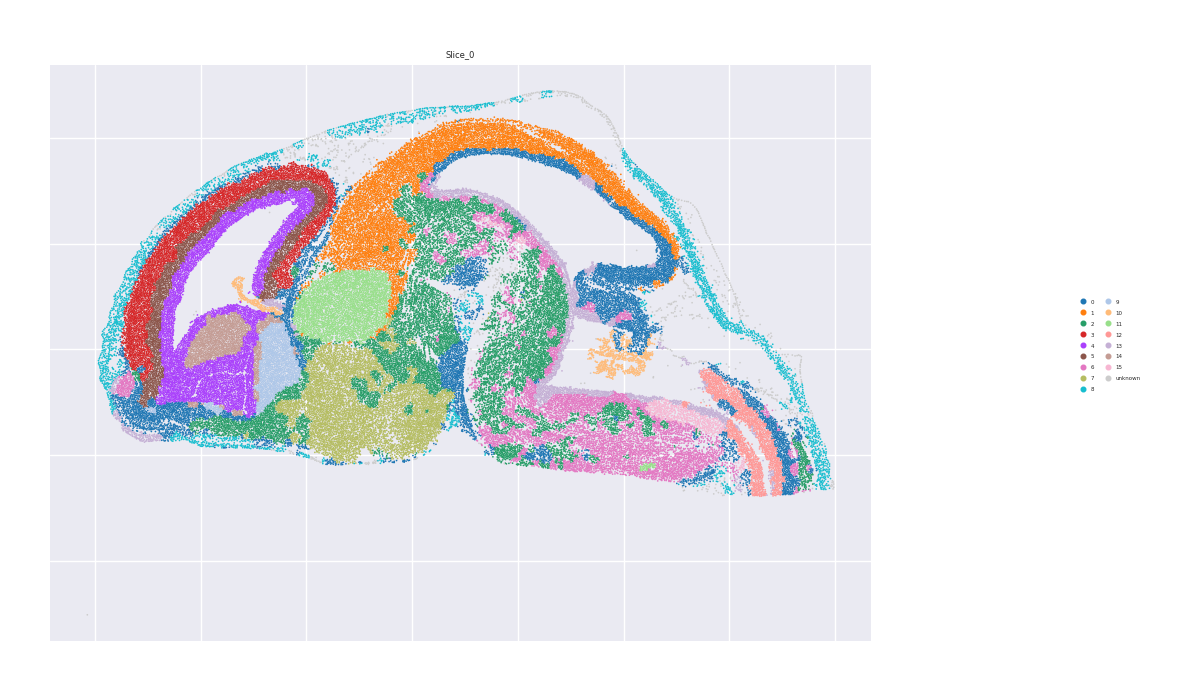

[2023-09-11 11:56:25][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_all_clustering took 1.0631s


In [5]:
# plot comunities (functional modules)
ccd.plot('all_clustering')

Bar plot of cell communities abundance in tissue slice.

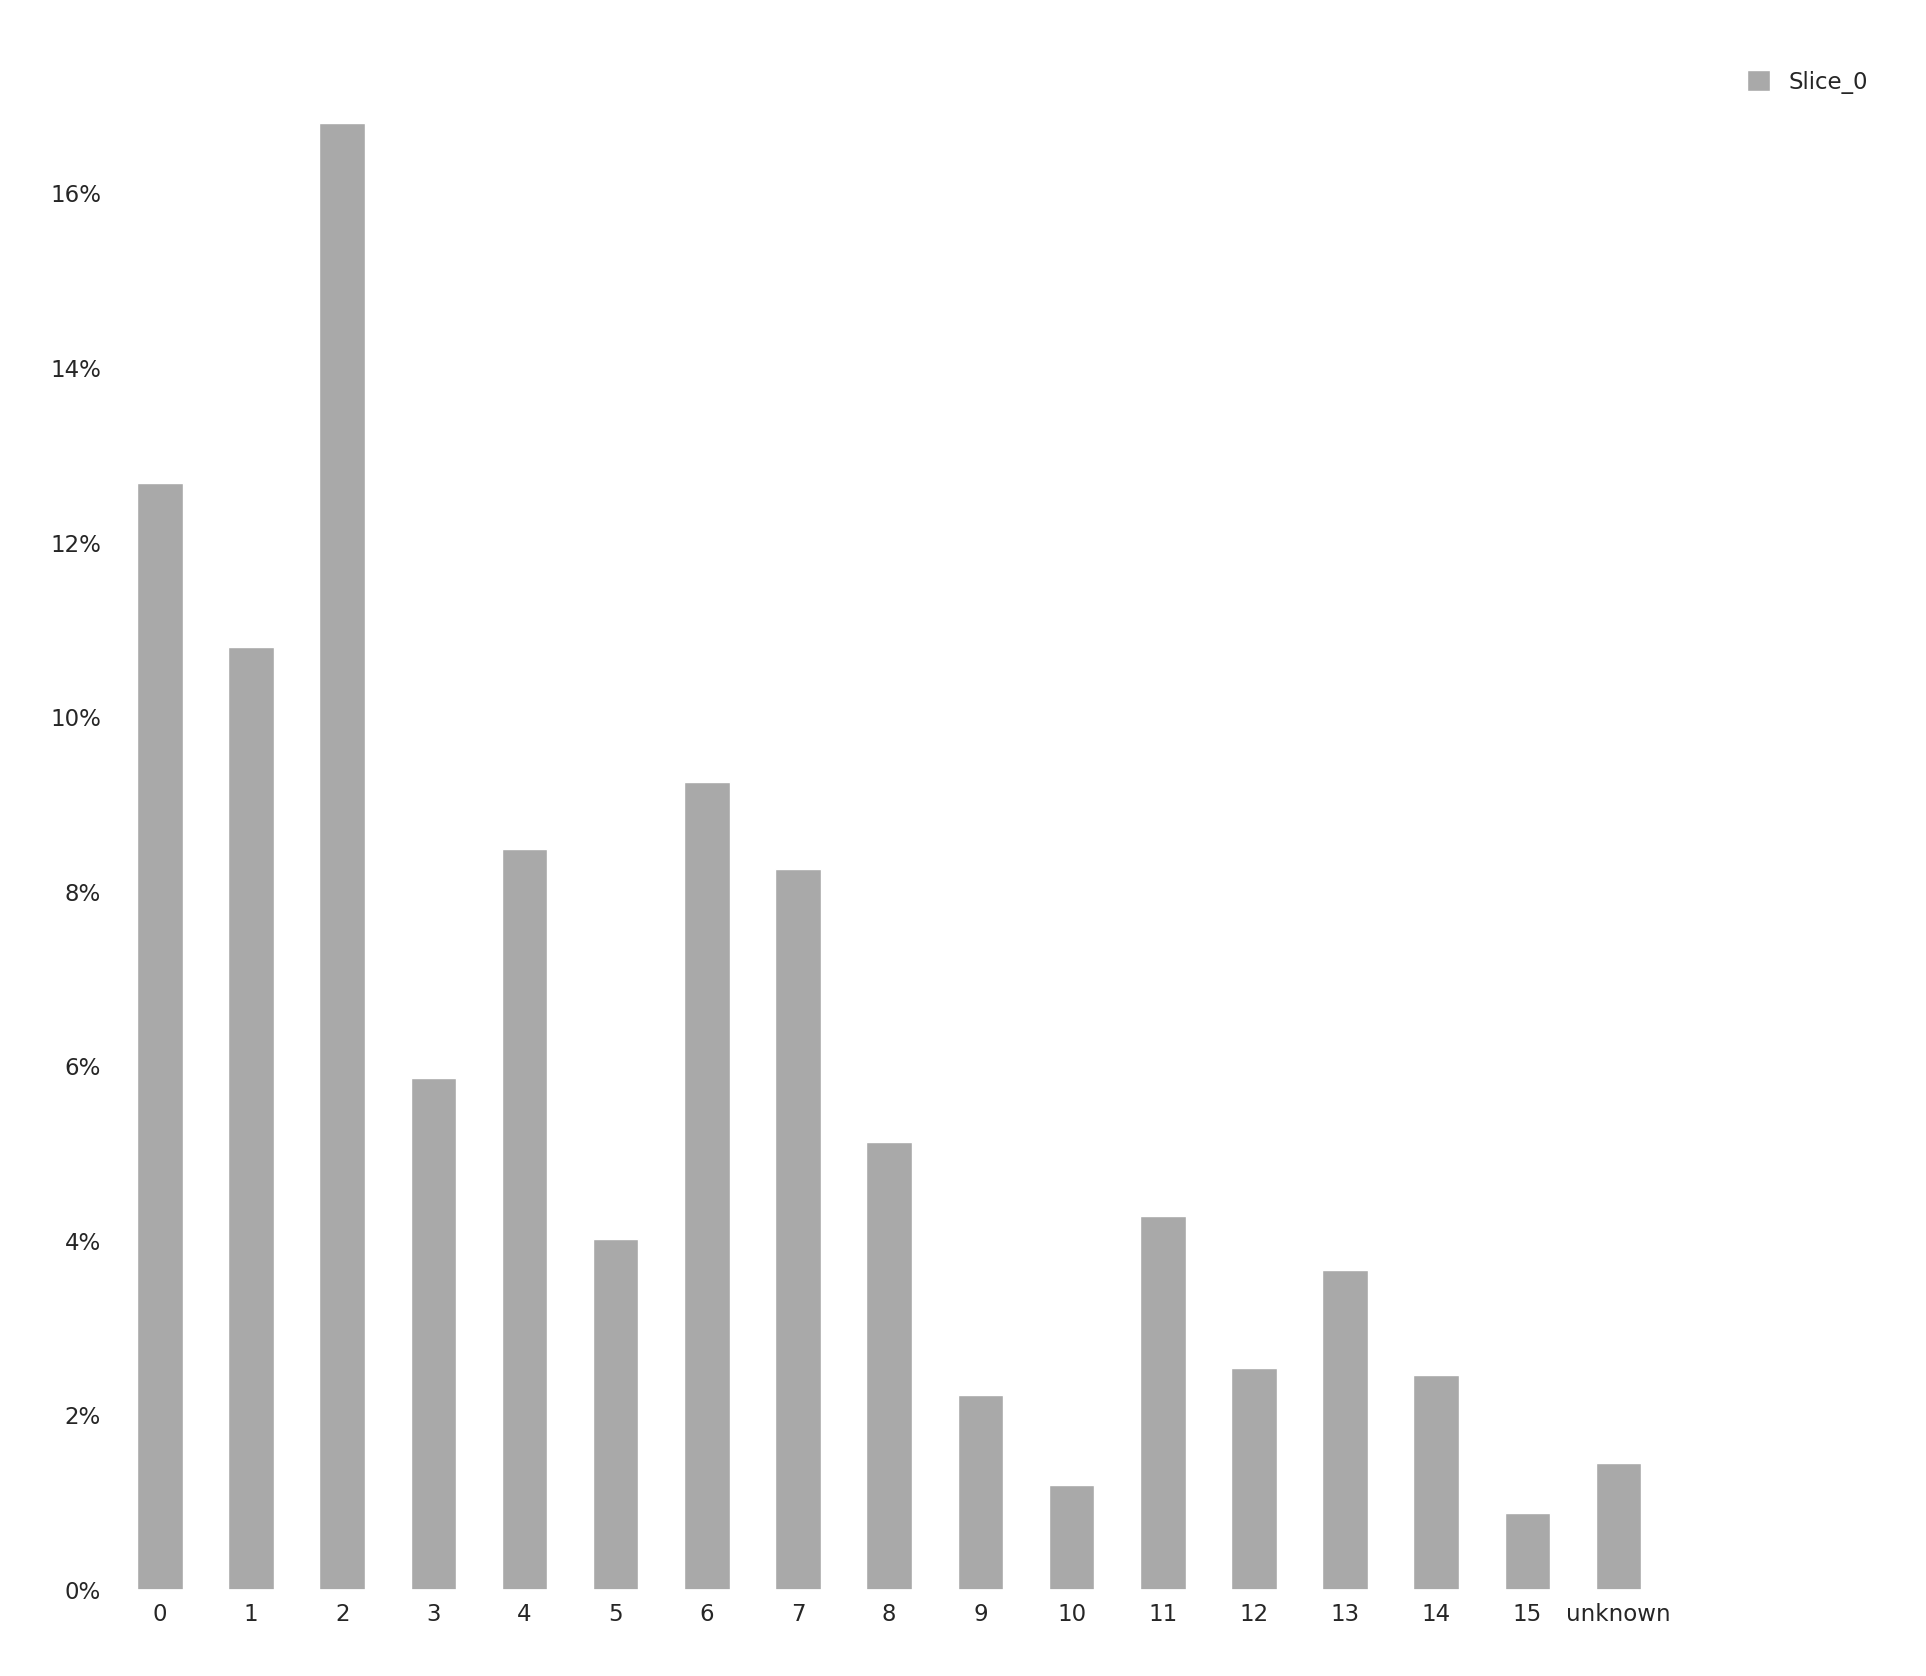

[2023-09-11 11:56:25][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_cluster_abundance_total took 0.4393s


In [6]:
# show percentages of presence of communities detected in the slice
ccd.plot('cluster_abundance_total')

In [7]:
ms_ccd = ms_data.tl.ms_community_detection(
    annotation='annotation', 
    scatter_thres=0.2, 
    cluster_algo='agglomerative', 
    n_clusters=25, 
    out_path="./results", 
    plotting=5,
    hide_plots=True
)

[2023-09-11 11:56:25][Stereo][26988][MainThread][139824720418624][community_detection][75][INFO]: Window sizes and/or sliding steps not provided by user - proceeding to calculate optimal values
[2023-09-11 11:56:25][Stereo][26988][MainThread][139824720418624][community_detection][328][INFO]: Window size info for slice: Slice_0     
                     window size: 12
                     sliding step: 6
                     cells mean: 55.78
                     cells median: 64.0
                     num horizontal windows: 9
                     num vertical windows: 12

                     
[2023-09-11 11:56:25][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function calc_optimal_win_size_and_slide_step took 0.0211s
[2023-09-11 11:56:25][Stereo][26988][MainThread][139824720418624][community_detection][82][INFO]: Downsample rate is not provided by user - proceeding to calculate one based on minimal window size.
[2023-09-11 11:56:25][Stereo][26988][MainThread][1398247

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Table of cell type abundances per cluster and type (colors are matched with cluster and cell type annotation colors).

This table allows analyst to detect the infuence of cell types on different communities, especially when cell types have small number of cells in the slice.

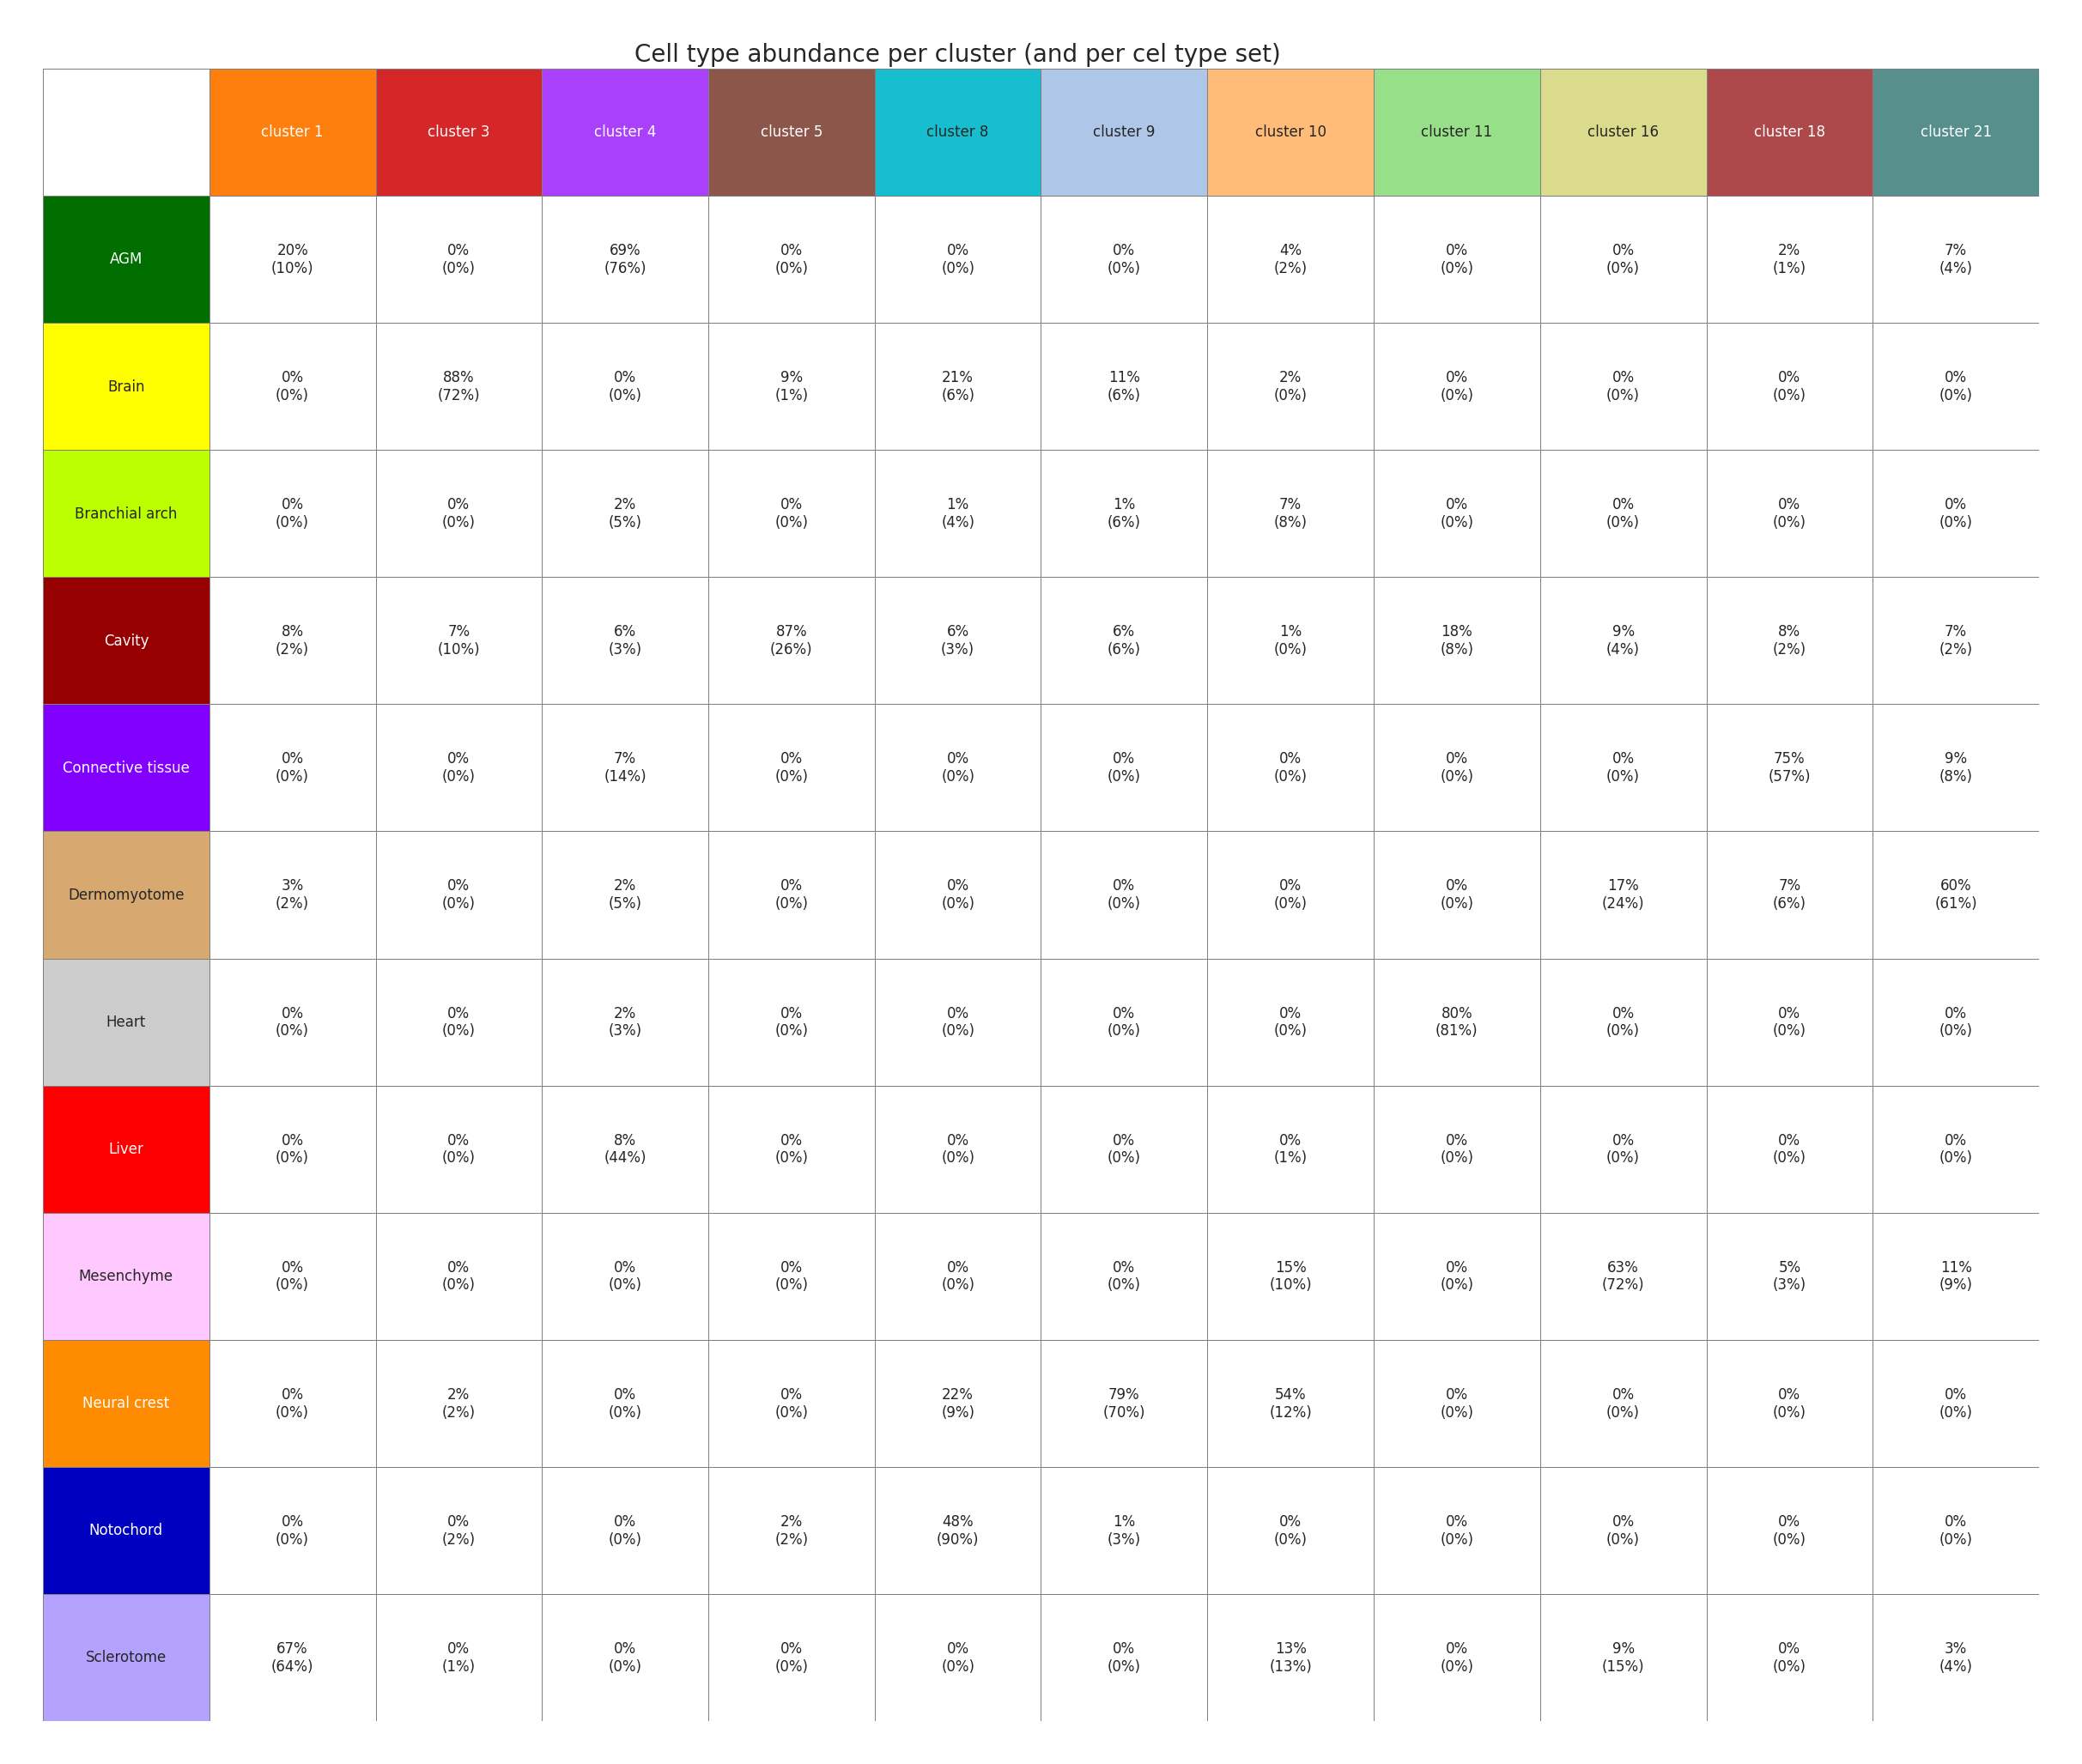

[2023-09-11 11:57:24][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_celltype_table took 2.8694s


<Figure size 640x480 with 0 Axes>

In [8]:
ms_ccd.plot('cell_types_table')

#### Per community

Display of cell type mixtures for specified community. Provides insight on spatial influence and cell type abundance.

[2023-09-11 12:27:08][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.0532s
[2023-09-11 12:27:08][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.0589s


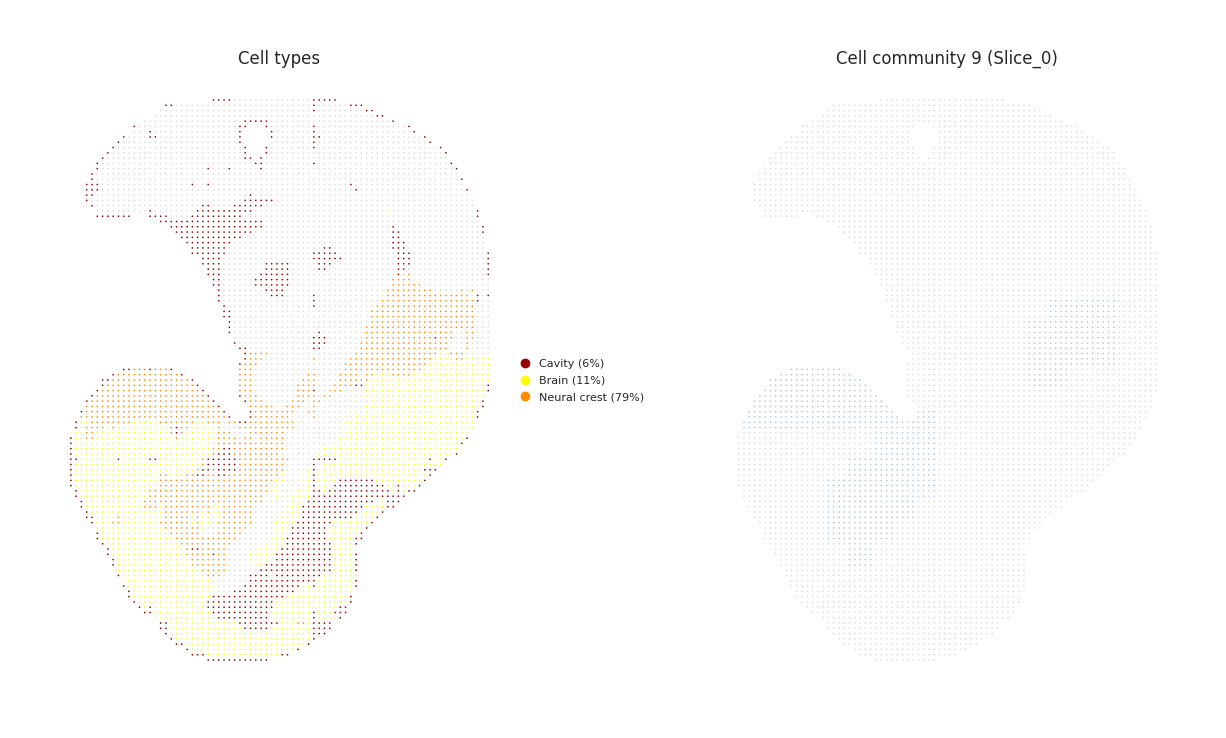

[2023-09-11 12:27:09][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_cluster_mixtures took 0.7751s
[2023-09-11 12:27:09][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.0526s
[2023-09-11 12:27:09][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_spatial took 0.0589s


<Figure size 640x480 with 0 Axes>

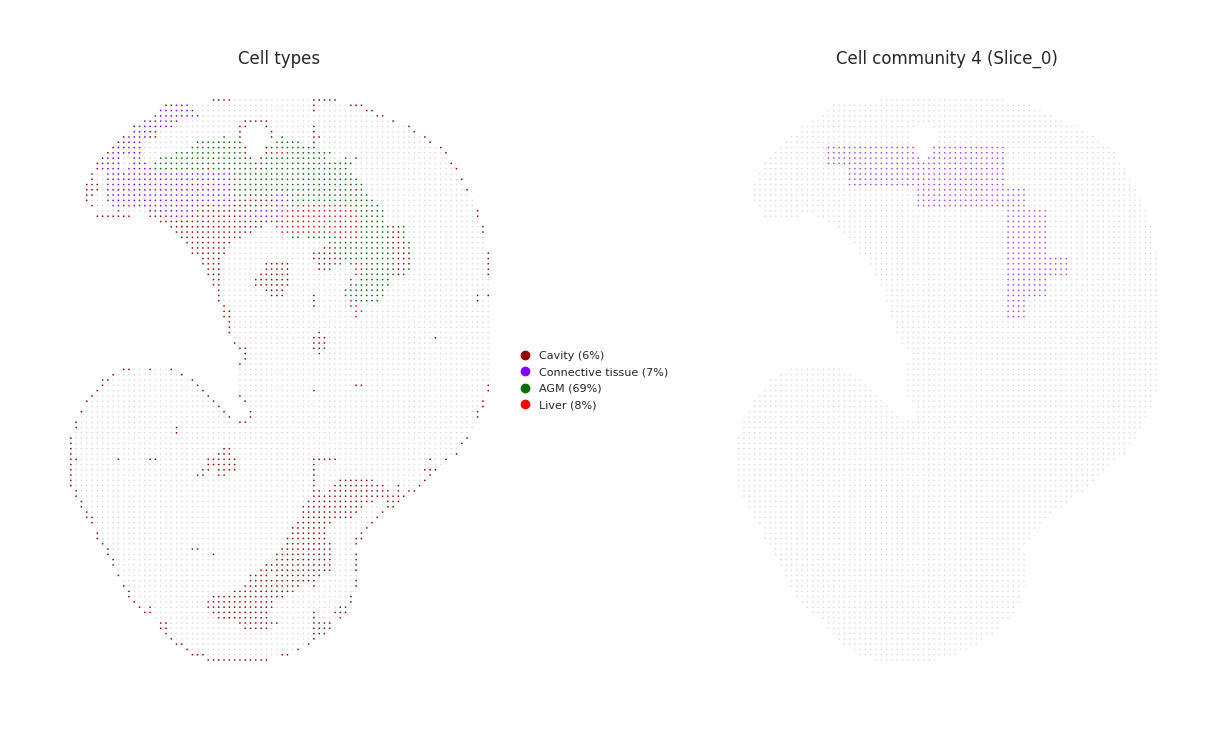

[2023-09-11 12:27:10][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function plot_cluster_mixtures took 0.7915s


<Figure size 640x480 with 0 Axes>

In [36]:
# Plot cell types in community 8 and 3
ms_ccd.plot('cluster_mixtures', slice_id=0, community_id=8)
ms_ccd.plot('cluster_mixtures', slice_id=0, community_id=3)

Boxplot of cell type percentages in a community per each window that belongs to the community.

This plot provides information on community uniformity and smoothness. Significant variance in cell type percentages suggest possible merge of several communities and need for increase of the clustering resolution (as shown for community 3).

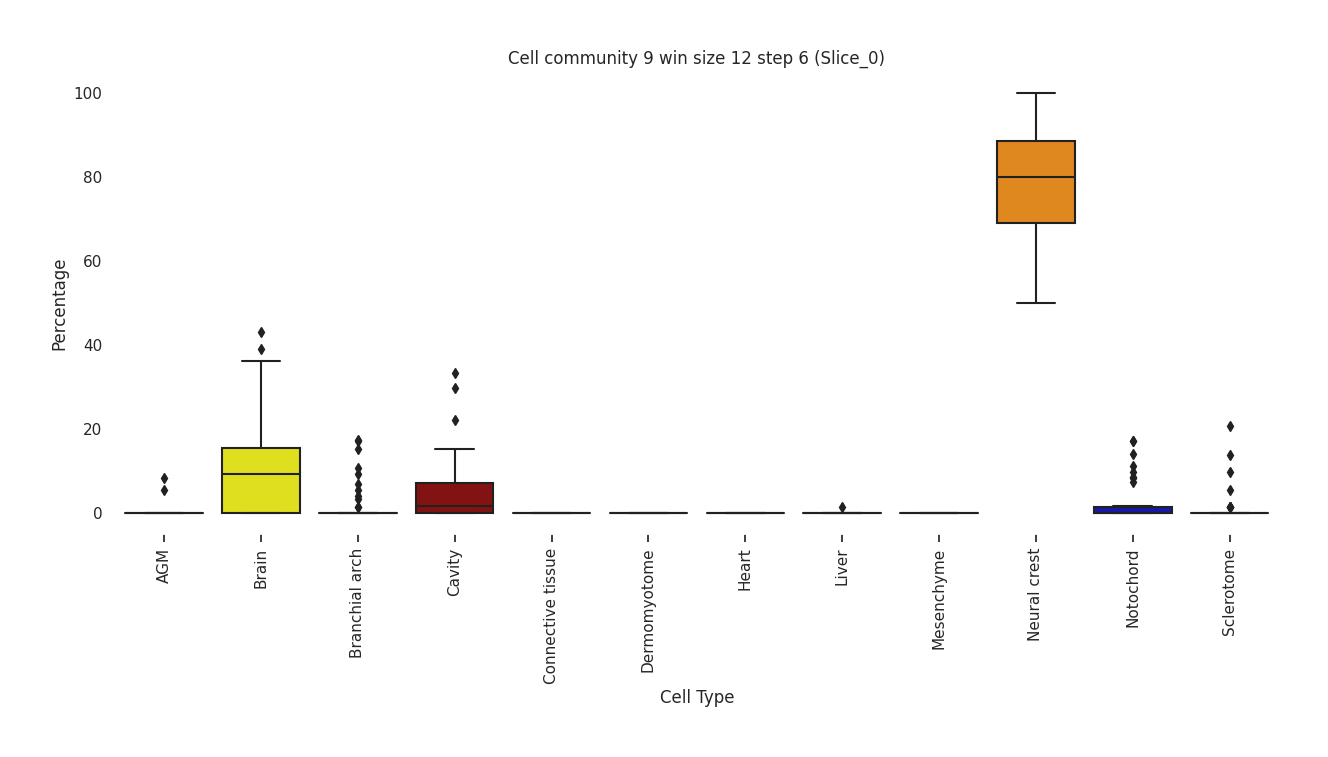

[2023-09-11 12:32:16][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function boxplot_stats took 0.3099s


<Figure size 640x480 with 0 Axes>

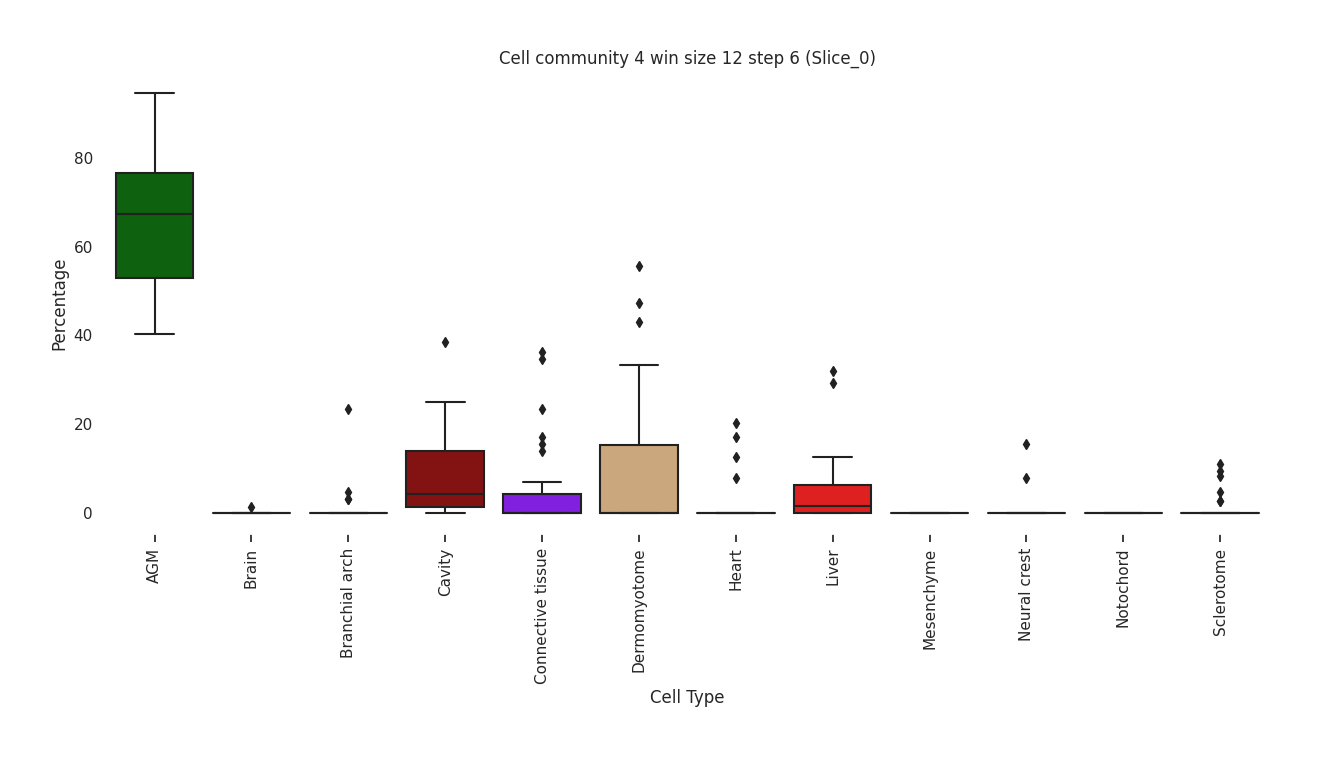

[2023-09-11 12:32:16][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function boxplot_stats took 0.6032s


<Figure size 640x480 with 0 Axes>

In [42]:
# plot percentage of presence of cell types in windows belonging to community 8 and 3
ms_ccd.plot('boxplot', slice_id=0, community_id=8)
ms_ccd.plot('boxplot', slice_id=0, community_id=3)

Colorplot of cell percentages in a community per each window that belongs to the community. The percentages of top three cell types in the community for each window are used as R,G and B values and plotted over the tissue image.

This plot provides visual spatial information on community uniformity and smoothness. Significant difference in cell type percentages provides different colors and shows the possible existence of several communities and need for increase of the clustering resolution (as shown for community 3).

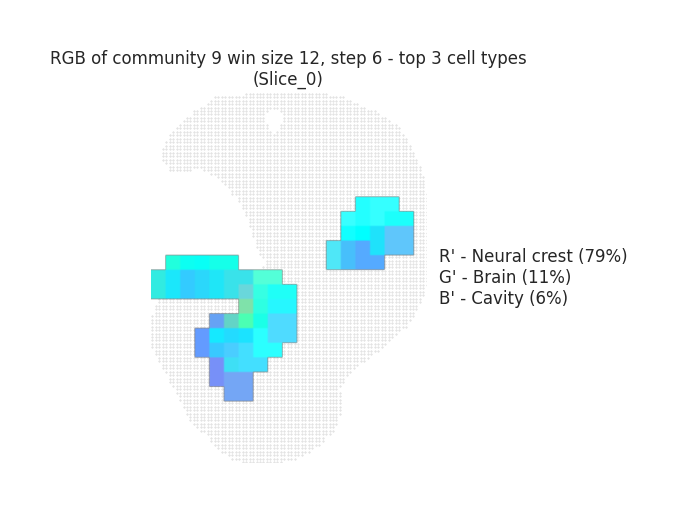

[2023-09-11 12:33:26][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function colorplot_stats took 0.1925s


<Figure size 640x480 with 0 Axes>

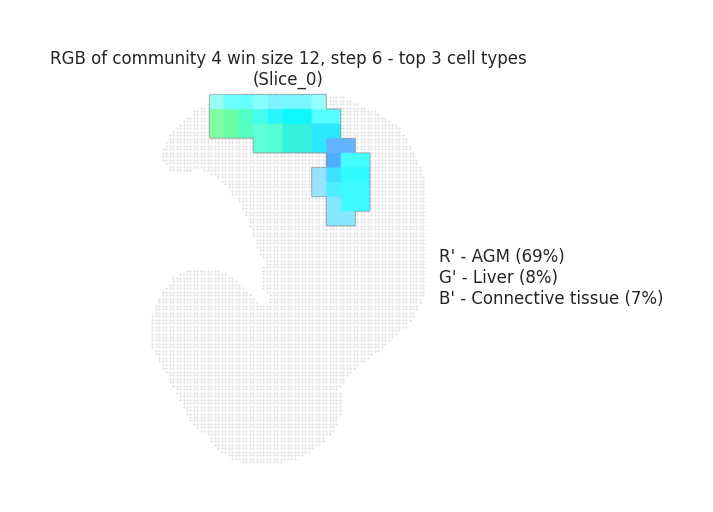

[2023-09-11 12:33:26][Stereo][26988][MainThread][139824720418624][utils][27][INFO]: Function colorplot_stats took 0.1781s


<Figure size 640x480 with 0 Axes>

In [43]:
# plot for community 8 and 3 of windows colored using percentages of top 3 cell types mapped into R, G and B color channels
ms_ccd.plot('colorplot', slice_id=0, community_id=8)
ms_ccd.plot('colorplot', slice_id=0, community_id=3)

## Additional options

CCD also includes several filtering steps controlled with parameters, such as removal of cell types present in all parts of the tissue and removal of windows with too small number of cell-spots: 
- Spatial distribution of each cell type can be evaluated using 2D entropy and scatteredness metrics. CCD supports setting the threshold values for these metrics in order to exclude cell types which are randomly or evenly spread throughout the tissue from processing. Removing cell types with high entropy and scatteredness improves clustering and provides more robust cell communities.
- The robustness and quality of CCD strongly depends on clustering. In order for clustering to be stable, feature vectors need to contain significant amount of information, that is, enough cell-spots in each evaluated window. CCD gathers data on total cell numbers per window and supports setting a threshold value for minimum cell-spot number for the window to be included in the clustering process. Cell-spots are marked with <font color='grey'>_'unknown'_</font> label if there are no cell community labeled windows that overlap them.

Final results and visualisations produced by CCD are aggregated into the structured HTML report enabling researches to get the full insight into the obtained communities and their statistics.

## Running CCD in a shell

After installing stereopy, you can also run CCD in a shell by command `ccd` like below:

    ccd --input data/slice1.h5ad data/slice2.h5ad --annotation=annotation

    `--input` is used to receive a h5ad file, space separated list of h5ad files or path of directory contains some h5ad files and `--annotation` specifies the key getting the cell type from `obs`.

Running `ccd --help` to get further information about other arguments.
